In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
filepath = "data/Concrete.csv"
concrete_strength = pd.read_csv(filepath)
concrete_strength.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
from sklearn.linear_model import LinearRegression
concrete_strength.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

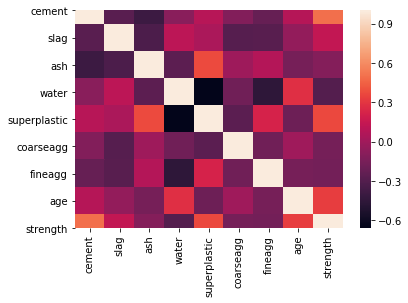

In [4]:
sns.heatmap(concrete_strength.corr())

In [5]:
X = concrete_strength[['cement', 'slag', 'ash', 'water', 'coarseagg',
       'fineagg', 'age']]
y = concrete_strength['strength']
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
polyFeat = PolynomialFeatures(degree=2)
X_poly = polyFeat.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.5, random_state=42)

https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386

In [6]:
pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)
predictions = pol_reg.predict(X_test)
print(pol_reg.intercept_)
coeff_df = pd.DataFrame(pol_reg.coef_)
coeff_df

-1590.5809101823518


,0
0,-8.331731e-12
1,9.441381e-01
2,1.115711e+00
3,1.008586e-01
4,7.732932e+00
5,5.947372e-01
6,1.180361e+00
7,3.038235e-01
8,-1.692791e-04
9,-2.398155e-04


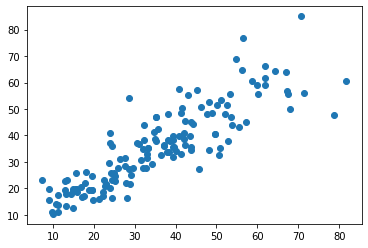

In [7]:
plt.scatter(y_test,predictions)

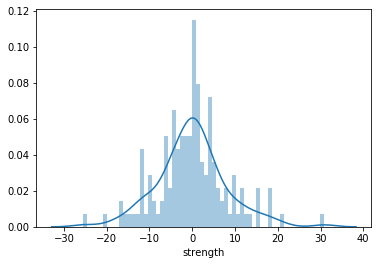

In [8]:
sns.distplot((y_test-predictions), bins=60)

In [9]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.971420624682631
MSE: 67.20220705198793
RMSE: 8.197695228049644


In [10]:
pd.DataFrame(pol_reg.coef_)

,0
0,-8.331731e-12
1,9.441381e-01
2,1.115711e+00
3,1.008586e-01
4,7.732932e+00
5,5.947372e-01
6,1.180361e+00
7,3.038235e-01
8,-1.692791e-04
9,-2.398155e-04
